In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# pip install numpy scipy matplotlib ipython jupyter pandas sympy nose sal_timer

In [3]:
# Paths ...
PROJECT_ROOT_DIR = os.getcwd()
# PATH_TO_DATA = os.path.join(PROJECT_ROOT_DIR, os.pardir, os.pardir, os.pardir, 'data') # TODO make cross
PATH_TO_DATA = 'C:\Salem\machine-learning\data'  # TODO make cross
# PATH_TO_DATA = '/home/salem/WorkSpaces/python/machine-learning/data'

In [4]:
def get_data():
    path = os.path.join(PATH_TO_DATA, 'housing', 'housing.csv')
    df = pd.read_csv(path)
    return df

In [5]:
def value_counts(df, key):
    print(df[key].value_counts())

In [6]:
df = get_data()

df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# TODO ...

In [9]:
# df.ocean_proximity.value_counts()
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# TODO ...

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# TODO ...

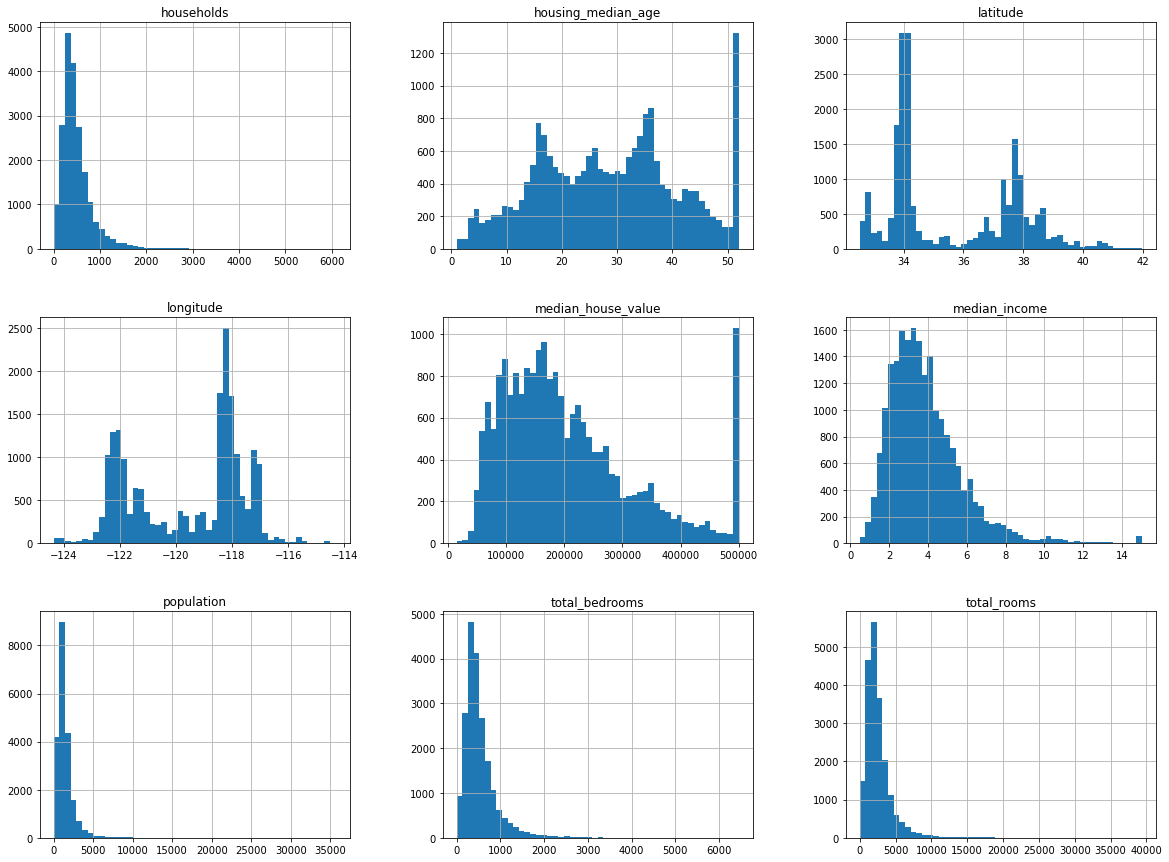

In [13]:
df.hist(bins=50, figsize=(20,15));
# plt.show()

In [14]:
# TODO ...

# Preprocessing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

housing = df.copy()
strat_train_set = []
strat_test_set = []

# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  income_cat          16512 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [19]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
 10  income_cat          4128 non-null   float64
dtypes: float64(10), object(1)
memory usage: 387.0+ KB


In [20]:
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0


In [21]:
# X ...
housing = strat_train_set.drop('median_house_value', axis=1)
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0


In [22]:
# y ...
housing_label = strat_train_set['median_house_value'].copy()
housing_label[:2]

17606    286600.0
18632    340600.0
Name: median_house_value, dtype: float64

## Cleaning Data / Missing Data

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
housing.dropna(subset=['total_bedrooms']).head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0


In [25]:
housing.shape

(16512, 10)

In [26]:
# delete rows which has empty values ...
housing.dropna(subset=['total_bedrooms']).shape

(16354, 10)

In [27]:
# delete the feature from dataset ...
housing.drop('total_bedrooms', axis=1).shape

(16512, 9)

In [28]:
# # fill the empty value of features ...
# medain = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(medain, inplace=True)

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   income_cat          16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [30]:
imputer = SimpleImputer(strategy='median')
imputer

SimpleImputer(strategy='median')

In [31]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.shape

(16512, 9)

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [34]:
for k in housing_num.columns:
    print('{0} median : {1}'.format(k, housing_num[k].median()))

longitude median : -118.51
latitude median : 34.26
housing_median_age median : 29.0
total_rooms median : 2119.5
total_bedrooms median : 433.0
population median : 1164.0
households median : 408.0
median_income median : 3.5408999999999997
income_cat median : 3.0


In [35]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  339.    ,    2.7042,
           2.    ],
       [-121.93  ,   37.05  ,   14.    , ...,  113.    ,    6.4214,
           5.    ],
       [-117.2   ,   32.77  ,   31.    , ...,  462.    ,    2.8621,
           2.    ],
       ...,
       [-116.4   ,   34.09  ,    9.    , ...,  765.    ,    3.2723,
           3.    ],
       [-118.01  ,   33.82  ,   31.    , ...,  356.    ,    4.0625,
           3.    ],
       [-122.45  ,   37.77  ,   52.    , ...,  639.    ,    3.575 ,
           3.    ]])

## Category feature

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [37]:
label_encoder = LabelEncoder()

housing_cat = housing['ocean_proximity']
housing_cat_encoded = label_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [38]:
label_encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [39]:
one_hot_encoder = OneHotEncoder()

housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
label_binarizer_encoder = LabelBinarizer()

housing_cat_1hot = label_binarizer_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [42]:
label_binarizer_encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='<U10')

### Custom Transformer [[1.1.]](#resources)

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

In [45]:
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

In [46]:
#
# This code come from book [1.1.], page 82.
#

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [47]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs.shape

(16512, 12)

## Feature Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [49]:
xx = np.array([3,4,5]).reshape(-1, 1)

In [50]:
# sacle into range [0,1]
MinMaxScaler().fit_transform(xx)

array([[0. ],
       [0.5],
       [1. ]])

In [51]:
## the smallest value 2 after scaling not equall 0
xx/xx.max()

array([[0.6],
       [0.8],
       [1. ]])

In [52]:
# ...
StandardScaler().fit_transform(xx)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

different range of MinMax ....

In [53]:
MinMaxScaler(feature_range=(0,1)).fit_transform(xx)

array([[0. ],
       [0.5],
       [1. ]])

In [54]:
MinMaxScaler(feature_range=(0.5,1)).fit_transform(xx)

array([[0.5 ],
       [0.75],
       [1.  ]])

In [55]:
MinMaxScaler(feature_range=(-1,0)).fit_transform(xx)

array([[-1. ],
       [-0.5],
       [ 0. ]])

In [56]:
MinMaxScaler(feature_range=(2,3)).fit_transform(xx)

array([[2. ],
       [2.5],
       [3. ]])

## Pipelines 

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [58]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [59]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [60]:
# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [61]:
# ...
# num_attribs = housing_num.columns
# num_attribs = housing_num.keys()
num_attribs = list(housing_num)

# ...
cat_attribs = ["ocean_proximity"]

# ...
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [62]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [63]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [64]:
 housing_prepared.shape

(16512, 17)

# Model Selection

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [66]:
lin_reg = LinearRegression()

In [67]:
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [68]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


In [69]:
some_labels = housing_label.iloc[:5]
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [70]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.95445595, -0.31205452,
        -0.08649871,  0.15531753,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  1.89030518,  0.21768338,
        -0.03353391, -0.83628902,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.95445595, -0.46531516,
        -0.09240499,  0.4222004 ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.95445595, -0.07966124,
         0.08973561, -0.19645314,  0.        ,  1.        ,  0.        ,
         0.        

In [71]:
pred = lin_reg.predict(some_data_prepared)

In [72]:
df = pd.DataFrame({
    'pred': pred,
    'label': some_labels
})

df

,pred,label
17606,203682.373795,286600.0
18632,326371.393708,340600.0
14650,204218.645882,196900.0
3230,58685.477048,46300.0
3555,194213.064430,254500.0


In [73]:
pred = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_label, pred)
lin_mse

4675365301.740765

In [74]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [75]:
tree_reg = DecisionTreeRegressor()
tree_reg

DecisionTreeRegressor()

In [76]:
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [77]:
tree_pred = tree_reg.predict(housing_prepared)

In [78]:
tree_mse = mean_squared_error(tree_pred, housing_label)
tree_mse

0.0

**Could be overfit**

In [79]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor


# Difference between cross_val_score and cross_val_predict
# 
# https://stackoverflow.com/questions/43613443/difference-between-cross-val-score-and-cross-val-predict/43613924
# https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated

# The cross_validate function differs from cross_val_score in two ways:
#
# https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation
#


In [81]:
tree_scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_label,
    scoring='neg_mean_squared_error',
    cv=10)
tree_scores

array([-4.84357160e+09, -4.34182135e+09, -4.74777322e+09, -4.71032346e+09,
       -5.06350218e+09, -5.73947865e+09, -5.14894900e+09, -4.86616798e+09,
       -6.01490934e+09, -4.94497539e+09])

In [105]:
-tree_scores.mean()

5042147215.380497

In [83]:
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores.mean()

70933.22582593601

In [84]:
tree_rmse_scores.std()

3259.5535441625275

In [85]:
lin_scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_label,
    scoring='neg_mean_squared_error',
    cv=10)
lin_scores

array([-4.47260312e+09, -4.43664168e+09, -4.98095924e+09, -5.50266468e+09,
       -4.58103208e+09, -5.05566056e+09, -4.19679290e+09, -4.58482007e+09,
       -5.05242395e+09, -4.58161640e+09])

In [86]:
lin_scores.mean()

-4744521469.218296

In [87]:
lin_scores.std()

370108489.7710796

In [88]:
forest_reg = RandomForestRegressor()
forest_reg

RandomForestRegressor()

In [89]:
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor()

In [90]:
forest_pred = forest_reg.predict(housing_prepared)

In [91]:
forest_mse = mean_squared_error(housing_label, forest_pred)
forest_mse

347640446.51222014

In [93]:
forest_scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_label,
    scoring='neg_mean_squared_error',
    cv=10)
forest_scores

array([-4.47260312e+09, -4.43664168e+09, -4.98095924e+09, -5.50266468e+09,
       -4.58103208e+09, -5.05566056e+09, -4.19679290e+09, -4.58482007e+09,
       -5.05242395e+09, -4.58161640e+09])

In [94]:
forest_scores.mean()

-4744521469.218296

In [95]:
forest_scores.std()

370108489.7710796

In [99]:
forest_rmse = np.sqrt(-forest_scores)
forest_rmse = forest_rmse.mean()
forest_rmse

68828.99948449328

In [96]:
df = pd.DataFrame({
    'clf': [lin_reg, tree_reg, forest_reg],
    'mse': [lin_mse, tree_mse, forest_mse],
    'rmse': [lin_rmse, tree_rmse, forest_rmse],
    'score_mean': [lin_scores.mean(), tree_scores.mean(), forest_scores.mean()],
    'score_std': [lin_scores.std(), tree_scores.std(), forest_scores.std()]
    
})

df

,clf,mse,rmse,score_mean,score_std
0,LinearRegression(),4.675365e+09,68376.642955,-4.744521e+09,3.701085e+08
1,DecisionTreeRegressor(),0.000000e+00,0.000000,-5.042147e+09,4.702619e+08
2,"(DecisionTreeRegressor(max_features='auto', ra...",3.476404e+08,18645.118571,-4.744521e+09,3.701085e+08


## Tune model

In [106]:
from sklearn.model_selection import GridSearchCV

In [101]:
scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_label,
    scoring="neg_mean_squared_error",
    cv=10
)

In [103]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69441.19574593, 68085.56663185, 71530.62010185, 67702.47809225,
       71350.34638783, 76532.67166714, 71134.97018402, 69263.10675622,
       77306.55175231, 70026.0307396 ])

In [104]:
tree_rmse_scores = tree_rmse_scores.mean()
tree_rmse_scores

71237.3538059

In [135]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
param_grid

[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

In [136]:
forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

In [128]:
# grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [129]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [130]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [131]:
cvres = grid_search.cv_results_

cvres

{'mean_fit_time': array([0.24125514, 0.76343532, 0.29118838, 0.98704243, 0.37805529,
        1.2122407 ]),
 'std_fit_time': array([0.00466782, 0.00886005, 0.01005443, 0.0157964 , 0.00744569,
        0.0075826 ]),
 'mean_score_time': array([0.00620575, 0.02192225, 0.00950403, 0.01925149, 0.00993123,
        0.024788  ]),
 'std_score_time': array([0.00316376, 0.00766838, 0.00584832, 0.00669401, 0.00604747,
        0.00628819]),
 'param_bootstrap': masked_array(data=[False, False, False, False, False, False],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[2, 2, 3, 3, 4, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[3, 10, 3, 10, 3, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'boot

In [132]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62805.52917192821 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54462.1410888642 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61117.32056104296 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53022.992252269294 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
60234.58052562756 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
52712.989031117104 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [133]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.241255,0.004668,0.006206,0.003164,False,2,3,"{'bootstrap': False, 'max_features': 2, 'n_est...",-3.776348e+09,-4.007550e+09,...,-3.944534e+09,1.773098e+08,6,-0.000000,-28.431793,-0.000000,-0.000000,-0.000000,-5.686359,11.372717
1,0.763435,0.008860,0.021922,0.007668,False,2,10,"{'bootstrap': False, 'max_features': 2, 'n_est...",-2.800426e+09,-2.985411e+09,...,-2.966125e+09,1.385473e+08,3,-0.000000,-2.558861,-4822.180167,-871.158213,-5676.576187,-2274.494686,2464.517461
2,0.291188,0.010054,0.009504,0.005848,False,3,3,"{'bootstrap': False, 'max_features': 3, 'n_est...",-3.577790e+09,-3.742428e+09,...,-3.735327e+09,1.172880e+08,5,-0.000000,-0.000000,-0.000000,-10.766255,-48.616368,-11.876525,18.837220
3,0.987042,0.015796,0.019251,0.006694,False,3,10,"{'bootstrap': False, 'max_features': 3, 'n_est...",-2.698069e+09,-2.810563e+09,...,-2.811438e+09,1.152570e+08,2,-236.581119,-0.000000,-236.563210,-0.968963,-4.375473,-95.697753,115.032658
4,0.378055,0.007446,0.009931,0.006047,False,4,3,"{'bootstrap': False, 'max_features': 4, 'n_est...",-3.477450e+09,-3.607213e+09,...,-3.628205e+09,2.005349e+08,4,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
5,1.212241,0.007583,0.024788,0.006288,False,4,10,"{'bootstrap': False, 'max_features': 4, 'n_est...",-2.629701e+09,-2.787807e+09,...,-2.778659e+09,1.429733e+08,1,-0.000000,-1.832084,-0.000000,-0.000000,-24.224073,-5.211231,9.532865


# Resources

## Book
1. [[1.1] Hands on ML](#)